# Статика С1
На жесткую раму, закрепленную в точке А шарнирно, а в точке В прикрепленную или к невесомому стержню или к шарнирной опоре на катках (стержень прикреплен к раме и к неподвижной опоре шарнирами), действуют: сосредоточенные силы F1, F2, пара сил с моментом М. Определить реакции опор, пренебрегая весом рамы и стержней

In [1]:
import matplotlib.pyplot as plt
from numpy import pi, cos, sin, linspace
from scipy.optimize import root

In [2]:
rad = lambda x: x*pi/180 #лямбда-функция для перевода градусов в радианы

grav = 9.8061 #ускорение свободного падения

vars = 25 #вариант задачи

Исходные данные.

In [3]:
ls = [2, 3, 2, 1, 3, 2, 1, 2, 3, 2]
forcer = {
    'K': [20, 10, 0, 0, 40, 30, 0, 0, 20, 30],
    'D': [40, 30, 0, 10, 20, 0, 0, 10, 0, 0],
    'H': [0, 0, 20, 0, 0, 10, 40, 30, 0, 0],
    'E': [0, 0, 40, 30, 0, 0, 20, 0, 40, 10]
}

corners = {
    'K': [210, 30, 0, 0, 300, 150, 0, 0, 225, 120],
    'D': [330, 135, 0, 45, 240, 0, 0, 45, 0, 0],
    'H': [0, 0, 240, 0, 0, 60, 330, 135, 0, 0],
    'E': [0, 0, 315, 120, 0, 0, 210, 0, 315, 60]
}

var = (vars//10, vars%10)

force, corner = {}, {}

for key, value in forcer.items():
    force[key] = value[var[1]]
    corner[key] = rad(corners[key][var[1]])

l = ls[var[1]]

M = 5
M = M if var[0] > 5 else -M
M, force, corner

(-5,
 {'K': 30, 'D': 0, 'H': 10, 'E': 0},
 {'K': 2.6179938779914944, 'D': 0.0, 'H': 1.0471975511965976, 'E': 0.0})

Функция назначения координат буквам, согласно варианту.

In [4]:
def drafter():
    global l, force, corner, var
    BS = [
        (4*l, -4*l), (2*l, 4*l), (-4*l, -2*l), (4*l, -5*l),
         (-4*l, -2*l), (l, -4*l), 0, 0, 0, 0
         ]

    worder = {
        'K': [(3*l, -l), (4*l, l), (-4*l, 2*l), (3*l, -3*l), (-l, 2*l),
              (-4*l, 0), (3*l, 4*l), (3*l, -3*l), (-l, 3*l), (4*l, l)],
        'D': [(3*l, 0), (3*l, 0), (-2*l, 2*l), (0, -3*l), (-4*l, l),
              (-4*l, -4*l), (0, 3*l), (0, -3*l), (-l, 4*l), (3*l, 0)],
        'H': [(3*l, -4*l), (3*l, 4*l), (-4*l, 0), (4*l, -4*l), (0, l),
              (-2*l, -4*l), (4*l, 3*l), (4*l, -4*l), (-l, 0), (3*l, 4*l)],
        'E': [(2*l, 0), (l, 0), (0, l), (4*l, -4*l), (0, 2*l), (-2*l, 0),
              (4*l, 4*l), (0, -l), (-2*l, 4*l), (l, 0)],
    }

    draftWord = {}
    for keys, value in worder.items():
        draftWord[keys] = [value[var[0]]]

    for key in draftWord:
        draftWord[key].append(
            (draftWord[key][0][0] + 0.025*l*force[key]*cos(corner[key]),
              draftWord[key][0][1] + 0.025*l*force[key]*sin(corner[key]))
            )

    return draftWord, BS[var[0]]

draftWord, B = drafter()
draftWord

{'K': [(-8, 4), (-9.299038105676658, 4.75)],
 'D': [(-4, 4), (-4.0, 4.0)],
 'H': [(-8, 0), (-7.75, 0.4330127018922193)],
 'E': [(0, 2), (0.0, 2.0)]}

В этой функции силы проецируются на оси координат и решаются три уравнения равновесия.

In [5]:
def caser():
    global l, M, force, corner, var

    draftWord, B = drafter()
    forceX, forceY, shoulderX, shoulderY = {}, {}, {}, {}
    caseX, caseY, torqueA = 0, 0, 0

    for keyF, value in force.items():
        forceX[keyF] = value*cos(corner[keyF])
        forceY[keyF] = value*sin(corner[keyF])
        shoulderX[keyF] = draftWord[keyF][0][0]
        shoulderY[keyF] = draftWord[keyF][0][1]
        caseX += forceX[keyF]
        caseY += forceY[keyF]
        torqueA += forceY[keyF]*shoulderX[keyF]
        torqueA += forceX[keyF]*shoulderY[keyF]

    def equations(vars):
        if var[0] in (0, 1, 5):
            xA, yA, yB = vars
            eq1 = xA + caseX
            eq2 = yA + yB + caseY
            eq3 = yB * B[0] + torqueA + M
        elif var[0] in (2, 3, 4):
            xA, yA, xB = vars
            eq1 = xA + xB + caseX
            eq2 = yA + caseY
            eq3 = xB * B[1] + torqueA + M
        else:
            xA, yA, mA = vars
            eq1 = xA + caseX
            eq2 = yA + caseY
            eq3 = mA + torqueA + M

        return [eq1, eq2, eq3]

    initial_guess = [0, 0, 0]
    result = root(equations, initial_guess)

    return result.x[0], result.x[1], result.x[2]

caser()

(95.53203230275508, -23.660254037844382, -74.55127018922192)

Функция рисования конструкции, согласно варианту и визуализация сил, действующих на конструкцию.

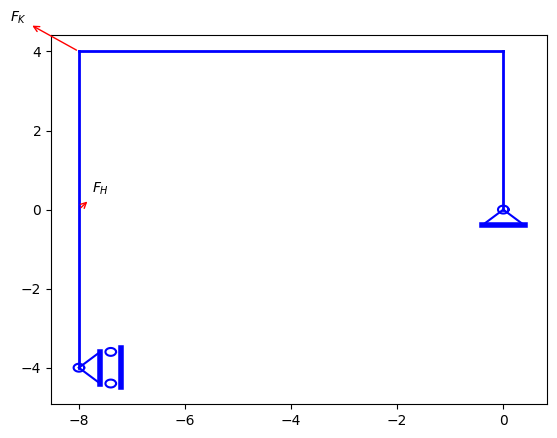

In [6]:
def plotTk():
    global l, force, corner, var
    draftWord, B = drafter()

    def circ(plt, x, y):
        global l
        theta = linspace( 0 , 2 * pi , 150 )
        radius = 0.05 * l
        a = radius * cos( theta ) + x
        b = radius * sin( theta ) + y
        return plt.plot(a, b, color='blue')

    def sharnStat(plt, x, y, i=True, j=True, types=True):
        global l
        circ(plt, x, y)
        a = [0.2*l, -0.2*l]
        b = [-abs(bs) for bs in a] if i else [abs(bs) for bs in a]
        b = b if types else [0 for bs in b]
        a, b = (a, b) if j else (b, a)
        if types:
          plt.plot((x, x+a[0]), (y, y+b[0]), color='blue')
          plt.plot((x, x+a[1]), (y, y+b[1]), color='blue')
          plt.plot((x+a[0], x+a[1]), (y+b[0], y+b[1]), lw=4, color='blue')
        else:
          plt.plot((x+a[0], x+a[1]), (y+b[0], y+b[1]), lw=4, color='blue')

    def sharnDrive(plt, x, y, i=True, j=True, types=True):
        global l
        a = [-0.2*l, 0.2*l, -0.2*l, 0.2*l, 0.25*l, -0.25*l, 0]
        b = [-0.2*l, -0.2*l, -0.3*l, -0.3*l, -0.4*l, -0.4*l, -0.4*l]
        b = b if i else [-bs for bs in b]
        a, b = (a, b) if j else (b, a)
        if types:
          circ(plt, x, y)
          plt.plot((x, x+a[0]), (y, y+b[0]), color='blue')
          plt.plot((x, x+a[1]), (y, y+b[1]), color='blue')
          plt.plot((x+a[0], x+a[1]), (y+b[0], y+b[1]), lw=4, color='blue')
          circ(plt, x+a[2], y+b[2])
          circ(plt, x+a[3], y+b[3])
        else:
          plt.plot((x, x+a[6]), (y, y+b[6]), lw=0.5, color='blue')
        plt.plot((x+a[4], x+a[5]), (y+b[4], y+b[5]), lw=4, color='blue')

    draft = [
        [(0, 3*l, 0, 0), (3*l, 3*l, 0, -4*l), (3*l, 4*l, -4*l, -4*l)],
        [(0, 4*l, 0, 0), (4*l, 4*l, 0, 4*l), (2*l, 4*l, 4*l, 4*l)],
        [(0, 0, 0, 2*l), (-4*l, 0, 2*l, 2*l), (-4*l, -4*l, 2*l, -2*l)],
        [(0, 0, 0, -3*l), (0, 4*l, -3*l, -3*l), (4*l, 4*l, -3*l, -5*l)],
        [(0, 0, 0, 2*l), (0, -4*l, 2*l, 2*l),(-4*l, -4*l, 2*l, -2*l)],
        [(0, -4*l, 0, 0),(-4*l, -4*l, 0, -4*l),(-4*l, l, -4*l, -4*l)],
        [(0, 0, 0, 4*l), (0, 4*l, 4*l, 4*l), (4*l, 4*l, 4*l, 2*l)],
        [(0, 0, 0, -3*l), (0, 4*l, -3*l, -3*l), (4*l, 4*l, -3*l, -5*l)],
        [(0, -l, 0, 0), (-l, -l, 0, 4*l), (-4*l, -l, 4*l, 4*l)],
        [(0, 4*l, 0, 0), (4*l, 4*l, 0, 4*l), (2*l, 4*l, 4*l, 4*l)]
    ]

    statDict = [
        (True, True, True), (True, True, True), (True, True, True),
        (False, False, True), (True, True, True), (True, True, True),
        (True, True, False), (True, True, False),
        (True, False, False), (True, False, False),
    ]

    driveDict = [
        (False, True, True), (True, True, True), (False, False, True),
        (True, False, False), (False, False, False),
        (True, True, False), False, False, False, False
    ]

    st = statDict[var[0]]
    dr = driveDict[var[0]]

    draft = draft[var[0]]
    sharnStat(plt, 0, 0, i=st[0], j=st[1], types=st[2])

    if st[2] : sharnDrive(plt, B[0], B[1], i=dr[0], j=dr[1], types=dr[2])

    for a, b, c, d in draft:
        plt.plot((a, b), (c, d), lw=2, color='blue')

    for key, value in draftWord.items():
      if force[key] > 0:
        plt.annotate(r'$F_%s$' % key, xy=value[0], xytext=value[1],
              arrowprops=dict(arrowstyle="<-",  color='red'))

plotTk()